# TF - Exemplo Real de regessão

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline

In [3]:
# 1 Million Points entre [0,10]
x_data = np.linspace(0.0,10.0,1000000)
# Ruido, para deixar masi aleartorio
noise = np.random.randn( len(x_data) )

Vamos fazer

y = mx + b

Where

     b = 5

In [4]:
# y_true é o valor real dessa multiplicação, ou seja, é o target
y_true =  (0.5 * x_data ) + 5 + noise

In [5]:
# criando dataFrame, perceba que é feito os seguintes passos
# Eh concatenado duas colunas para forma um unico data frame : x_data => y_true
my_data = pd.concat([pd.DataFrame(data=x_data, columns=['X Data']),
                     pd.DataFrame(data=y_true, columns=['Y'])],
                     axis = 1)

In [6]:
# vendo meu dataset
my_data.head()

,X Data,Y
0,0.00000,4.790135
1,0.00001,5.697048
2,0.00002,6.957731
3,0.00003,5.272629
4,0.00004,3.928956


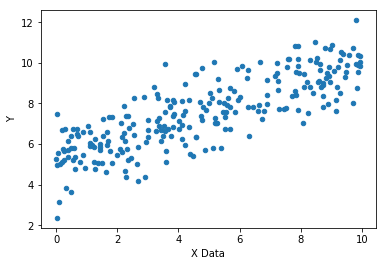

In [7]:
# Plotando
# OBS: com sample(250) pegamos somente 250, pois, como sao 1 milhao de pontos,
#    nao da pra pltora todos ele
my_data.sample(n=250).plot(kind='scatter',x='X Data',y='Y')
# Temos entao a amostra do nosso conjunto de dados
# como percebe é linear

## Conceito de Bach
 
1 milhoa de dados é muito para se processar por epoca. 1000 epocas equivaleria a processar 1 bilhão de linhas. Isso é muito.

Vamos entâo criar batch, que em resumo é épocas mas que nao se lê todos os dados. Vamos selecionar 8 dados alertorios e executar o treinamento

In [8]:
batch_size = 8 

In [11]:
# Inicializando variaveis
m = tf.Variable(0.5)
b = tf.Variable(1.0)
# PlaceHolders
xph = tf.placeholder(tf.float32,[batch_size])
yph = tf.placeholder(tf.float32,[batch_size])

** Graph **

In [12]:
y_model = m*xph + b

** Loss Function | Optimizer | Initialize Things **

In [13]:
# Definido o erro: reduzir erro quadrado
error = tf.reduce_sum(tf.square(yph - y_model))
# Adaptadno variaveis para minimizar erro
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.001)
train = optimizer.minimize(error)
# Inicializar variaveis
init = tf.global_variables_initializer()

In [18]:
with tf.Session() as sess:
    sess.run(init)
    batches = 1000
    for i in range(batches):
        # rand_ind = array de tamanho 8 com 8 indexes aleartorio
        rand_indexs = np.random.randint( len(x_data), size = batch_size)
        # colocando o place holder. vai por uma lista, ou seja, 8 poisçoes => 8 elemetnos
        feed = {xph: x_data[rand_indexs], yph: y_true[rand_indexs]}
        # executando o train com o feed
        sess.run(train, feed_dict = feed)
    model_m, model_b = sess.run([m,b])
# printando pesos no final
print('model_m:', model_m, '\nmodel_b:', model_b)
# Perceba que b deve dar proximo de 5, pois foi o que definmos la emcima

model_m: 0.531292 
model_b: 4.97325


## Vendo Rresultados

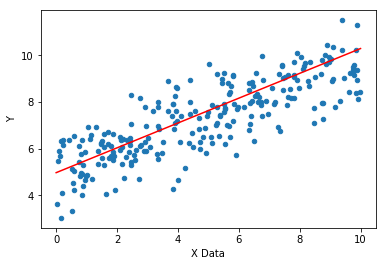

In [19]:
# Printando o B para sabersmo se esta bom
y_hat = x_data * model_m + model_b # y predizido
my_data.sample(n=250).plot(kind='scatter',x='X Data',y='Y')
plt.plot(x_data,y_hat,'r')

## tf.estimator API

Para usalas, temos que:
+ deniir lista de features (um tipo especial
+ criar o Estimator model
+ Criar função de entrada de dados (diferetne para nupy/pandas)
+ Call train, evaluate e predict plo estimador

+ o `sheflle` significa que não vai embaralhar
+ Ele é util para coisas bem simpels, em geral vamos sasr Variabels e PlaceHoldres


Esse é um exemplo bem simples para mostrar isso

In [20]:
# definindo lista de 
feat_cols = [tf.feature_column.numeric_column(key = 'x', shape = [1])]

In [21]:
estimator = tf.estimator.LinearRegressor(feature_columns = feat_cols)
# vai mostrar umone de coisa que nao importa

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_session_config': None, '_model_dir': 'C:\\Users\\Rafael\\AppData\\Local\\Temp\\tmphs97_3k6', '_keep_checkpoint_max': 5, '_save_summary_steps': 100, '_tf_random_seed': 1, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600}


In [22]:
# Vamos separar dados de teste e de treino
from sklearn.model_selection import train_test_split

In [24]:
x_train, x_eval, y_train, y_eval = train_test_split(x_data,y_true,
                                                    test_size=0.3, 
                                                    random_state = 101)
# printando para conferir
print('x_train.shape:' , x_train.shape, '\ty_train.shape:', y_train.shape)
print('x_eval.shape:' , x_eval.shape, '\ty_eval.shape:', y_eval.shape)

x_train.shape: (700000,) 	y_train.shape: (700000,)
x_eval.shape: (300000,) 	y_eval.shape: (300000,)


In [25]:
# função de entrada de dados
# Can also do .pandas_input_fn
input_func = tf.estimator.inputs.numpy_input_fn({'x':x_train},
                                                y_train,batch_size=4,
                                                num_epochs=None,
                                                shuffle=True)
# train function
train_input_func = tf.estimator.inputs.numpy_input_fn({'x':x_train},
                                                      y_train,batch_size=4,
                                                      num_epochs=1000,
                                                      shuffle=False)
# validar deados
eval_input_func = tf.estimator.inputs.numpy_input_fn({'x':x_eval},
                                                     y_eval,batch_size=4,
                                                     num_epochs=1000,
                                                     shuffle=False)

In [27]:
estimator.train(input_fn=input_func, steps=1000)
# As mensagens que da é em relaçâo ao erro durante o treinamento

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Restoring parameters from C:\Users\Rafael\AppData\Local\Temp\tmphs97_3k6\model.ckpt-1000
INFO:tensorflow:Saving checkpoints for 1001 into C:\Users\Rafael\AppData\Local\Temp\tmphs97_3k6\model.ckpt.
INFO:tensorflow:step = 1001, loss = 0.619688
INFO:tensorflow:global_step/sec: 558.238
INFO:tensorflow:step = 1101, loss = 3.12823 (0.181 sec)
INFO:tensorflow:global_step/sec: 609.341
INFO:tensorflow:step = 1201, loss = 1.31109 (0.163 sec)
INFO:tensorflow:global_step/sec: 605.662
INFO:tensorflow:step = 1301, loss = 5.03555 (0.165 sec)
INFO:tensorflow:global_step/sec: 628.508
INFO:tensorflow:step = 1401, loss = 8.12682 (0.161 sec)
INFO:tensorflow:global_step/sec: 613.091
INFO:tensorflow:step = 1501, loss = 1.39737 (0.163 sec)
INFO:tensorflow:global_step/sec: 452.184
INFO:tensorflow:step = 1601, loss = 7.64122 (0.226 sec)
INFO:tensorflow:global_step/sec: 540.179
INFO:tensorflow:step = 1701, loss = 2.89806 (0.180 sec)
INFO:tensorflow:glo

In [30]:
# Validanddo dados
train_metrics = estimator.evaluate(input_fn = train_input_func, steps=1000)

INFO:tensorflow:Starting evaluation at 2018-07-07-21:20:19
INFO:tensorflow:Restoring parameters from C:\Users\Rafael\AppData\Local\Temp\tmphs97_3k6\model.ckpt-2000
INFO:tensorflow:Evaluation [1/1000]
INFO:tensorflow:Evaluation [2/1000]
INFO:tensorflow:Evaluation [3/1000]
INFO:tensorflow:Evaluation [4/1000]
INFO:tensorflow:Evaluation [5/1000]
INFO:tensorflow:Evaluation [6/1000]
INFO:tensorflow:Evaluation [7/1000]
INFO:tensorflow:Evaluation [8/1000]
INFO:tensorflow:Evaluation [9/1000]
INFO:tensorflow:Evaluation [10/1000]
INFO:tensorflow:Evaluation [11/1000]
INFO:tensorflow:Evaluation [12/1000]
INFO:tensorflow:Evaluation [13/1000]
INFO:tensorflow:Evaluation [14/1000]
INFO:tensorflow:Evaluation [15/1000]
INFO:tensorflow:Evaluation [16/1000]
INFO:tensorflow:Evaluation [17/1000]
INFO:tensorflow:Evaluation [18/1000]
INFO:tensorflow:Evaluation [19/1000]
INFO:tensorflow:Evaluation [20/1000]
INFO:tensorflow:Evaluation [21/1000]
INFO:tensorflow:Evaluation [22/1000]
INFO:tensorflow:Evaluation [23/

INFO:tensorflow:Evaluation [216/1000]
INFO:tensorflow:Evaluation [217/1000]
INFO:tensorflow:Evaluation [218/1000]
INFO:tensorflow:Evaluation [219/1000]
INFO:tensorflow:Evaluation [220/1000]
INFO:tensorflow:Evaluation [221/1000]
INFO:tensorflow:Evaluation [222/1000]
INFO:tensorflow:Evaluation [223/1000]
INFO:tensorflow:Evaluation [224/1000]
INFO:tensorflow:Evaluation [225/1000]
INFO:tensorflow:Evaluation [226/1000]
INFO:tensorflow:Evaluation [227/1000]
INFO:tensorflow:Evaluation [228/1000]
INFO:tensorflow:Evaluation [229/1000]
INFO:tensorflow:Evaluation [230/1000]
INFO:tensorflow:Evaluation [231/1000]
INFO:tensorflow:Evaluation [232/1000]
INFO:tensorflow:Evaluation [233/1000]
INFO:tensorflow:Evaluation [234/1000]
INFO:tensorflow:Evaluation [235/1000]
INFO:tensorflow:Evaluation [236/1000]
INFO:tensorflow:Evaluation [237/1000]
INFO:tensorflow:Evaluation [238/1000]
INFO:tensorflow:Evaluation [239/1000]
INFO:tensorflow:Evaluation [240/1000]
INFO:tensorflow:Evaluation [241/1000]
INFO:tensorf

INFO:tensorflow:Evaluation [432/1000]
INFO:tensorflow:Evaluation [433/1000]
INFO:tensorflow:Evaluation [434/1000]
INFO:tensorflow:Evaluation [435/1000]
INFO:tensorflow:Evaluation [436/1000]
INFO:tensorflow:Evaluation [437/1000]
INFO:tensorflow:Evaluation [438/1000]
INFO:tensorflow:Evaluation [439/1000]
INFO:tensorflow:Evaluation [440/1000]
INFO:tensorflow:Evaluation [441/1000]
INFO:tensorflow:Evaluation [442/1000]
INFO:tensorflow:Evaluation [443/1000]
INFO:tensorflow:Evaluation [444/1000]
INFO:tensorflow:Evaluation [445/1000]
INFO:tensorflow:Evaluation [446/1000]
INFO:tensorflow:Evaluation [447/1000]
INFO:tensorflow:Evaluation [448/1000]
INFO:tensorflow:Evaluation [449/1000]
INFO:tensorflow:Evaluation [450/1000]
INFO:tensorflow:Evaluation [451/1000]
INFO:tensorflow:Evaluation [452/1000]
INFO:tensorflow:Evaluation [453/1000]
INFO:tensorflow:Evaluation [454/1000]
INFO:tensorflow:Evaluation [455/1000]
INFO:tensorflow:Evaluation [456/1000]
INFO:tensorflow:Evaluation [457/1000]
INFO:tensorf

INFO:tensorflow:Evaluation [648/1000]
INFO:tensorflow:Evaluation [649/1000]
INFO:tensorflow:Evaluation [650/1000]
INFO:tensorflow:Evaluation [651/1000]
INFO:tensorflow:Evaluation [652/1000]
INFO:tensorflow:Evaluation [653/1000]
INFO:tensorflow:Evaluation [654/1000]
INFO:tensorflow:Evaluation [655/1000]
INFO:tensorflow:Evaluation [656/1000]
INFO:tensorflow:Evaluation [657/1000]
INFO:tensorflow:Evaluation [658/1000]
INFO:tensorflow:Evaluation [659/1000]
INFO:tensorflow:Evaluation [660/1000]
INFO:tensorflow:Evaluation [661/1000]
INFO:tensorflow:Evaluation [662/1000]
INFO:tensorflow:Evaluation [663/1000]
INFO:tensorflow:Evaluation [664/1000]
INFO:tensorflow:Evaluation [665/1000]
INFO:tensorflow:Evaluation [666/1000]
INFO:tensorflow:Evaluation [667/1000]
INFO:tensorflow:Evaluation [668/1000]
INFO:tensorflow:Evaluation [669/1000]
INFO:tensorflow:Evaluation [670/1000]
INFO:tensorflow:Evaluation [671/1000]
INFO:tensorflow:Evaluation [672/1000]
INFO:tensorflow:Evaluation [673/1000]
INFO:tensorf

INFO:tensorflow:Evaluation [864/1000]
INFO:tensorflow:Evaluation [865/1000]
INFO:tensorflow:Evaluation [866/1000]
INFO:tensorflow:Evaluation [867/1000]
INFO:tensorflow:Evaluation [868/1000]
INFO:tensorflow:Evaluation [869/1000]
INFO:tensorflow:Evaluation [870/1000]
INFO:tensorflow:Evaluation [871/1000]
INFO:tensorflow:Evaluation [872/1000]
INFO:tensorflow:Evaluation [873/1000]
INFO:tensorflow:Evaluation [874/1000]
INFO:tensorflow:Evaluation [875/1000]
INFO:tensorflow:Evaluation [876/1000]
INFO:tensorflow:Evaluation [877/1000]
INFO:tensorflow:Evaluation [878/1000]
INFO:tensorflow:Evaluation [879/1000]
INFO:tensorflow:Evaluation [880/1000]
INFO:tensorflow:Evaluation [881/1000]
INFO:tensorflow:Evaluation [882/1000]
INFO:tensorflow:Evaluation [883/1000]
INFO:tensorflow:Evaluation [884/1000]
INFO:tensorflow:Evaluation [885/1000]
INFO:tensorflow:Evaluation [886/1000]
INFO:tensorflow:Evaluation [887/1000]
INFO:tensorflow:Evaluation [888/1000]
INFO:tensorflow:Evaluation [889/1000]
INFO:tensorf

In [31]:
eval_metrics = estimator.evaluate(input_fn=eval_input_func,steps=1000)

INFO:tensorflow:Starting evaluation at 2018-07-07-21:20:36
INFO:tensorflow:Restoring parameters from C:\Users\Rafael\AppData\Local\Temp\tmphs97_3k6\model.ckpt-2000
INFO:tensorflow:Evaluation [1/1000]
INFO:tensorflow:Evaluation [2/1000]
INFO:tensorflow:Evaluation [3/1000]
INFO:tensorflow:Evaluation [4/1000]
INFO:tensorflow:Evaluation [5/1000]
INFO:tensorflow:Evaluation [6/1000]
INFO:tensorflow:Evaluation [7/1000]
INFO:tensorflow:Evaluation [8/1000]
INFO:tensorflow:Evaluation [9/1000]
INFO:tensorflow:Evaluation [10/1000]
INFO:tensorflow:Evaluation [11/1000]
INFO:tensorflow:Evaluation [12/1000]
INFO:tensorflow:Evaluation [13/1000]
INFO:tensorflow:Evaluation [14/1000]
INFO:tensorflow:Evaluation [15/1000]
INFO:tensorflow:Evaluation [16/1000]
INFO:tensorflow:Evaluation [17/1000]
INFO:tensorflow:Evaluation [18/1000]
INFO:tensorflow:Evaluation [19/1000]
INFO:tensorflow:Evaluation [20/1000]
INFO:tensorflow:Evaluation [21/1000]
INFO:tensorflow:Evaluation [22/1000]
INFO:tensorflow:Evaluation [23/

INFO:tensorflow:Evaluation [215/1000]
INFO:tensorflow:Evaluation [216/1000]
INFO:tensorflow:Evaluation [217/1000]
INFO:tensorflow:Evaluation [218/1000]
INFO:tensorflow:Evaluation [219/1000]
INFO:tensorflow:Evaluation [220/1000]
INFO:tensorflow:Evaluation [221/1000]
INFO:tensorflow:Evaluation [222/1000]
INFO:tensorflow:Evaluation [223/1000]
INFO:tensorflow:Evaluation [224/1000]
INFO:tensorflow:Evaluation [225/1000]
INFO:tensorflow:Evaluation [226/1000]
INFO:tensorflow:Evaluation [227/1000]
INFO:tensorflow:Evaluation [228/1000]
INFO:tensorflow:Evaluation [229/1000]
INFO:tensorflow:Evaluation [230/1000]
INFO:tensorflow:Evaluation [231/1000]
INFO:tensorflow:Evaluation [232/1000]
INFO:tensorflow:Evaluation [233/1000]
INFO:tensorflow:Evaluation [234/1000]
INFO:tensorflow:Evaluation [235/1000]
INFO:tensorflow:Evaluation [236/1000]
INFO:tensorflow:Evaluation [237/1000]
INFO:tensorflow:Evaluation [238/1000]
INFO:tensorflow:Evaluation [239/1000]
INFO:tensorflow:Evaluation [240/1000]
INFO:tensorf

INFO:tensorflow:Evaluation [431/1000]
INFO:tensorflow:Evaluation [432/1000]
INFO:tensorflow:Evaluation [433/1000]
INFO:tensorflow:Evaluation [434/1000]
INFO:tensorflow:Evaluation [435/1000]
INFO:tensorflow:Evaluation [436/1000]
INFO:tensorflow:Evaluation [437/1000]
INFO:tensorflow:Evaluation [438/1000]
INFO:tensorflow:Evaluation [439/1000]
INFO:tensorflow:Evaluation [440/1000]
INFO:tensorflow:Evaluation [441/1000]
INFO:tensorflow:Evaluation [442/1000]
INFO:tensorflow:Evaluation [443/1000]
INFO:tensorflow:Evaluation [444/1000]
INFO:tensorflow:Evaluation [445/1000]
INFO:tensorflow:Evaluation [446/1000]
INFO:tensorflow:Evaluation [447/1000]
INFO:tensorflow:Evaluation [448/1000]
INFO:tensorflow:Evaluation [449/1000]
INFO:tensorflow:Evaluation [450/1000]
INFO:tensorflow:Evaluation [451/1000]
INFO:tensorflow:Evaluation [452/1000]
INFO:tensorflow:Evaluation [453/1000]
INFO:tensorflow:Evaluation [454/1000]
INFO:tensorflow:Evaluation [455/1000]
INFO:tensorflow:Evaluation [456/1000]
INFO:tensorf

INFO:tensorflow:Evaluation [647/1000]
INFO:tensorflow:Evaluation [648/1000]
INFO:tensorflow:Evaluation [649/1000]
INFO:tensorflow:Evaluation [650/1000]
INFO:tensorflow:Evaluation [651/1000]
INFO:tensorflow:Evaluation [652/1000]
INFO:tensorflow:Evaluation [653/1000]
INFO:tensorflow:Evaluation [654/1000]
INFO:tensorflow:Evaluation [655/1000]
INFO:tensorflow:Evaluation [656/1000]
INFO:tensorflow:Evaluation [657/1000]
INFO:tensorflow:Evaluation [658/1000]
INFO:tensorflow:Evaluation [659/1000]
INFO:tensorflow:Evaluation [660/1000]
INFO:tensorflow:Evaluation [661/1000]
INFO:tensorflow:Evaluation [662/1000]
INFO:tensorflow:Evaluation [663/1000]
INFO:tensorflow:Evaluation [664/1000]
INFO:tensorflow:Evaluation [665/1000]
INFO:tensorflow:Evaluation [666/1000]
INFO:tensorflow:Evaluation [667/1000]
INFO:tensorflow:Evaluation [668/1000]
INFO:tensorflow:Evaluation [669/1000]
INFO:tensorflow:Evaluation [670/1000]
INFO:tensorflow:Evaluation [671/1000]
INFO:tensorflow:Evaluation [672/1000]
INFO:tensorf

INFO:tensorflow:Evaluation [863/1000]
INFO:tensorflow:Evaluation [864/1000]
INFO:tensorflow:Evaluation [865/1000]
INFO:tensorflow:Evaluation [866/1000]
INFO:tensorflow:Evaluation [867/1000]
INFO:tensorflow:Evaluation [868/1000]
INFO:tensorflow:Evaluation [869/1000]
INFO:tensorflow:Evaluation [870/1000]
INFO:tensorflow:Evaluation [871/1000]
INFO:tensorflow:Evaluation [872/1000]
INFO:tensorflow:Evaluation [873/1000]
INFO:tensorflow:Evaluation [874/1000]
INFO:tensorflow:Evaluation [875/1000]
INFO:tensorflow:Evaluation [876/1000]
INFO:tensorflow:Evaluation [877/1000]
INFO:tensorflow:Evaluation [878/1000]
INFO:tensorflow:Evaluation [879/1000]
INFO:tensorflow:Evaluation [880/1000]
INFO:tensorflow:Evaluation [881/1000]
INFO:tensorflow:Evaluation [882/1000]
INFO:tensorflow:Evaluation [883/1000]
INFO:tensorflow:Evaluation [884/1000]
INFO:tensorflow:Evaluation [885/1000]
INFO:tensorflow:Evaluation [886/1000]
INFO:tensorflow:Evaluation [887/1000]
INFO:tensorflow:Evaluation [888/1000]
INFO:tensorf

In [32]:
# vê o resultado destes resultados
print("train metrics: \n{}".format(train_metrics))
print("eval metrics: \n{}".format(eval_metrics))

train metrics: 
{'global_step': 2000, 'loss': 4.0601659, 'average_loss': 1.0150415}
eval metrics: 
{'global_step': 2000, 'loss': 4.0737185, 'average_loss': 1.0184296}


### Predictions brincar com a rede

In [35]:
# vou criar dados randomicos e por ele numa funçao
input_fn_predict = tf.estimator.inputs.numpy_input_fn({'x': np.linspace(0,10,10)},
                                                      shuffle = False)
# lista a predição, mas queremos o valor e a prediçâo
# list(estimator.predict(input_fn=input_fn_predict))
predictions = [] # np.array([])
for x in estimator.predict(input_fn=input_fn_predict):
    predictions.append(x['predictions'])
# printando x ==> y
predictions

INFO:tensorflow:Restoring parameters from C:\Users\Rafael\AppData\Local\Temp\tmphs97_3k6\model.ckpt-2000


[array([ 4.87178087], dtype=float32),
 array([ 5.46416998], dtype=float32),
 array([ 6.05655861], dtype=float32),
 array([ 6.64894772], dtype=float32),
 array([ 7.24133682], dtype=float32),
 array([ 7.83372498], dtype=float32),
 array([ 8.42611408], dtype=float32),
 array([ 9.01850319], dtype=float32),
 array([ 9.6108923], dtype=float32),
 array([ 10.2032814], dtype=float32)]

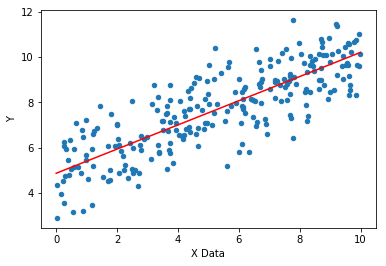

In [36]:
# plotando o grafico
my_data.sample(n=250).plot(kind='scatter', x='X Data', y='Y')
plt.plot(np.linspace(0,10,10), predictions, 'r')